# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [3]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [70]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [139]:
#  1. Get the total rides for each city type
city_ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
city_ride_count

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [140]:
# 2. Get the total drivers for each city type
city_driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]
city_driver_count

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [141]:
#  3. Get the total amount of fares for each city type
city_total_fare = pyber_data_df.groupby(["type"]).sum()["fare"]
city_total_fare

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [142]:
#  4. Get the average fare per ride for each city type. 
city_mean_fare = city_total_fare / city_ride_count
city_mean_fare

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [143]:
# 5. Get the average fare per driver for each city type. 
mean_driver_fare = city_total_fare / city_driver_count
mean_driver_fare

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [144]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame(
          {"Total Rides": city_ride_count,
          "Total Drivers": city_driver_count,
          "Total Fares": city_total_fare,
          "Average Fare per Ride": city_mean_fare,
          "Average Fare per Driver": mean_driver_fare})
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [145]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [146]:
print(pyber_summary_df.dtypes)

Total Rides                  int64
Total Drivers                int64
Total Fares                float64
Average Fare per Ride      float64
Average Fare per Driver    float64
dtype: object


In [147]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

# Display the data frame
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [229]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.908450e+12,46,Urban


In [230]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_data_df_sub = pyber_data_df.groupby(["type", "date"]).sum()["fare"]
pyber_data_df_sub 

type   date         
Rural  1/1/19 9:45      43.69
       1/11/19 4:39     16.42
       1/14/19 15:58    54.10
       1/14/19 7:09     18.05
       1/15/19 21:44    30.26
                        ...  
Urban  5/8/19 1:54      32.69
       5/8/19 2:31      41.33
       5/8/19 4:20      21.99
       5/8/19 4:39      18.45
       5/8/19 7:29      18.55
Name: fare, Length: 2364, dtype: float64

In [231]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
pyber_data_df_sub = pyber_data_df_sub.reset_index()
pyber_data_df_sub

,type,date,fare
0,Rural,1/1/19 9:45,43.69
1,Rural,1/11/19 4:39,16.42
2,Rural,1/14/19 15:58,54.10
3,Rural,1/14/19 7:09,18.05
4,Rural,1/15/19 21:44,30.26
...,...,...,...
2359,Urban,5/8/19 1:54,32.69
2360,Urban,5/8/19 2:31,41.33
2361,Urban,5/8/19 4:20,21.99
2362,Urban,5/8/19 4:39,18.45


In [232]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_data_df_sub["date"] = pd.to_datetime(pyber_data_df_sub["date"])
pyber_data_df_sub = pyber_data_df_sub.pivot(index='date', columns='type', values='fare')
pyber_data_df_sub

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:00,NaN,NaN,18.45
2019-05-08 07:29:00,NaN,NaN,18.55


In [233]:
print(pyber_data_df_sub.dtypes)

type
Rural       float64
Suburban    float64
Urban       float64
dtype: object


In [234]:
pyber_data_df_sub

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:00,NaN,NaN,18.45
2019-05-08 07:29:00,NaN,NaN,18.55


In [235]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
pyber_data_df_sub_4mos = pyber_data_df_sub.loc['2019-01-01 00:00:00':'2019-04-29 00:00:00']
pyber_data_df_sub_4mos

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:00,NaN,NaN,11.46
2019-04-28 16:29:00,NaN,NaN,36.42
2019-04-28 17:26:00,NaN,NaN,31.43


In [236]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
pyber_data_df_sub_4mos.index = pd.to_datetime(pyber_data_df_sub_4mos.index)

In [237]:
# 7. Check that the datatype for the index is datetime using df.info()
pyber_data_df_sub_4mos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2182 entries, 2019-01-01 00:08:00 to 2019-04-28 19:35:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  570 non-null    float64
 2   Urban     1501 non-null   float64
dtypes: float64(3)
memory usage: 68.2 KB


In [238]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pyber_data_df_sub_4mos_resampled = pyber_data_df_sub_4mos.resample('W').sum()
pyber_data_df_sub_4mos_resampled                                                                                  

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [239]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')


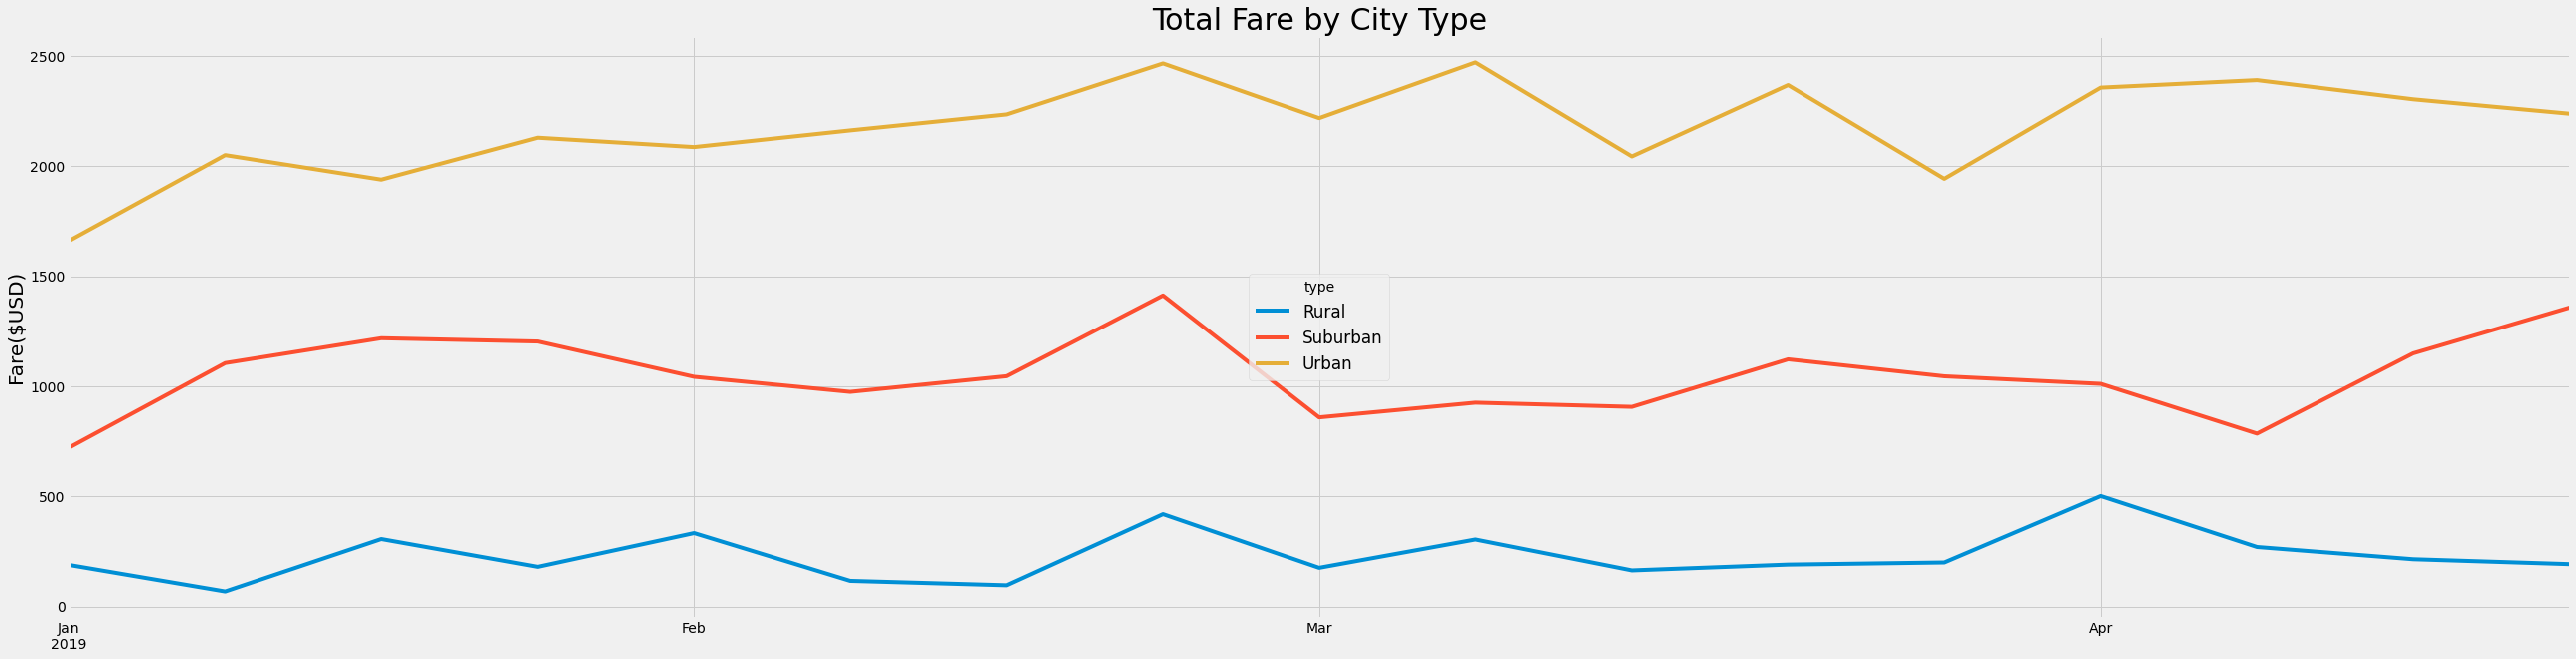

In [252]:
ax = pyber_data_df_sub_4mos_resampled.plot(kind='line')
plt.rcParams["figure.figsize"] = (40,10)
# fig, ax = plt.subplots(figsize=(10, 6))
ax.xaxis.set_label_text("")
ax.set_ylabel('Fare($USD)',fontsize=20)
ax.set_title('Total Fare by City Type',fontsize=30)
legend = plt.legend(title="type",loc = 'center', fontsize='large', fancybox=True)
plt.savefig("analysis/PyBer_fare_summary.png")
plt.show()